In [2]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



In [4]:
from keras.datasets import mnist

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [6]:
x_train[310].shape

(28, 28)

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [8]:
y_train[310]

1

In [9]:
from keras.utils import np_utils

In [10]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [11]:
y_train[310]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D,Dropout
import keras.optimizers

from keras.utils import np_utils
from keras.optimizers import SGD
from keras.models import Model

In [14]:
model = Sequential()

model.add(Conv2D(10,(5,5), padding='same',input_shape =(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(20,(5,5),padding='same'))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(20,(5,5),padding='same'))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(30,(5,5),padding='same'))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(30))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Dropout(0.25))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.compile(loss="categorical_crossentropy",
              optimizer='Adam',
              metrics=['accuracy'])


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        260       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 20)        5020      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 20)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 20)          0         
__________

In [17]:
model.fit(x_train, y_train, batch_size=100, epochs=4)

Instructions for updating:
Use tf.cast instead.
Epoch 1/4
60000/60000 [==============================] - 55s 912us/step - loss: 1.2960 - acc: 0.5634
Epoch 2/4
60000/60000 [==============================] - 56s 929us/step - loss: 0.6255 - acc: 0.7776
Epoch 3/4
60000/60000 [==============================] - 65s 1ms/step - loss: 0.5277 - acc: 0.7942
Epoch 4/4
60000/60000 [==============================] - 85s 1ms/step - loss: 0.4828 - acc: 0.8032


In [18]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 8s 757us/step
loss: 0.07027446015775203
正確率 0.9816


In [9]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train,y_train, batch_size = 100, epochs = 2, validation_data = (x_valid, y_valid), verbose = 2, shuffle = True) 

NameError: name 'model' is not defined

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  

NameError: name 'history' is not defined

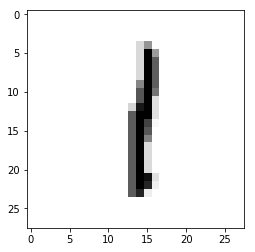

In [86]:
X=x_train[310].reshape(28,28)
plt.imshow(X,cmap='Greys')